### Student Details

Student Name: Divya Acharya

Student ID: 23283742


# Task 2: scikit learn

In [8]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [9]:
import pandas as pd
#df = pd.read_csv('', header=0)

df=pd.read_csv('Iris.csv')
################################
# Your code here
df.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
filtered_df = df[(df['class']=="Iris-setosa")|(df['class']=="Iris-virginica")]

# Extract the petal length and petal width as features
final_df = filtered_df[['petal_length', 'petal_width','class']]

In [11]:
final_df.sample(2)

,petal_length,petal_width,class
117,6.7,2.2,Iris-virginica
5,1.7,0.4,Iris-setosa


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


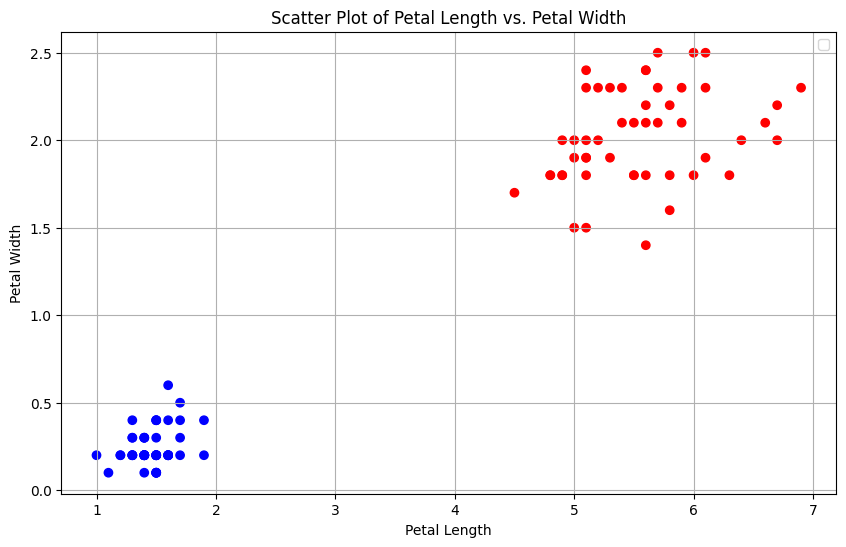

In [12]:
################################
# Your code here
import matplotlib.pyplot as plt




# Create a scatter plot with different colors for the two species
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'blue', 'Iris-virginica': 'red'}


plt.scatter(final_df['petal_length'],final_df['petal_width'],c=final_df['class'].apply(lambda x: colors[x]), marker='o')

# Add labels and a legend
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.legend()
plt.grid()

# Show the plot
plt.show()

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [15]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

################################
# Your code here
X = final_df[['petal_length','petal_width']].values
y = (final_df["class"]=="Iris-setosa").astype(int).values


perceptron = Perceptron(verbose=1,max_iter=1000,tol=1e-3)

perceptron.fit(X, y)

#y_pred = perceptron.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#rint(f"Accuracy: {accuracy}")

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

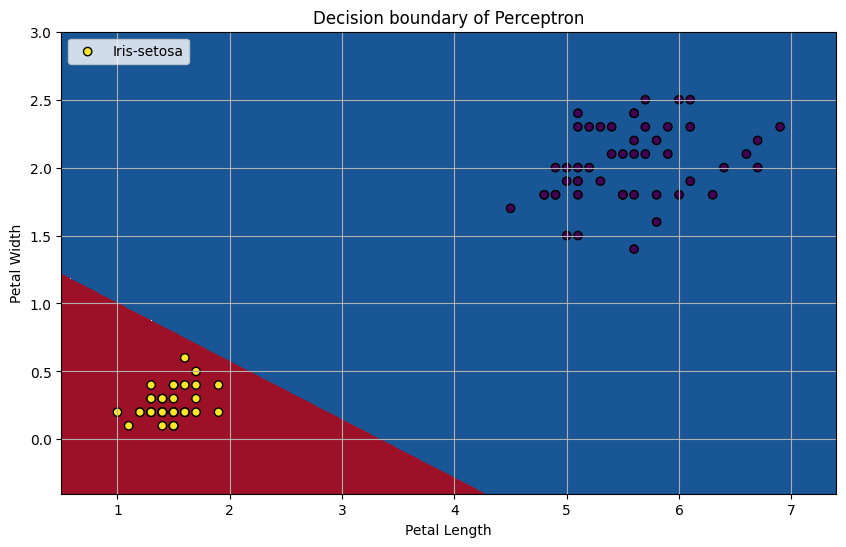

In [17]:
import random

# Generate a grid of points
x_min, x_max = final_df['petal_length'].min() - 0.5, final_df['petal_length'].max() + 0.5
y_min, y_max = final_df['petal_width'].min() - 0.5, final_df['petal_width'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5000), np.linspace(y_min, y_max, 5000))

# Predict the class for each point on the grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=1, cmap='RdBu_r')
plt.scatter(final_df['petal_length'], final_df['petal_width'], c=y, edgecolors='k')
plt.title('Decision boundary of Perceptron')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(colors.keys(), loc='upper left')
plt.grid(True)
plt.show()